# Lagrange point and their stability
## Given:
The linear variational equations of the colinear Lagrange points have two real and two imaginary roots.

## Find:
a) Earth-Moon system solve linear equation and plot equation for $L_1$ where $\xi_0 = 0.01$ and $eta_0 = 0$

b) What is the max distance from $L_1$. Period in day.

c) Find the Jacobi constant and plot the coressponding ZVC.

d) USE the IC conditions in the non-linear equations and compare the solutions. What happens if $\xi_0$ is smaller/ larger? How large can it be?

e) Repeat the analysis but for the real roots. Is departure hyperbolic? What is the time constant?

In [247]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import Solar_3 as SS3
from Functions import Keplarian_fnc as kp
from Functions import Poincare_fnc as pn
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from datetime import timedelta

In [248]:
# Given 
system = "Earth-Moon"

gamma2, L2 = pn.L2_Newton(SS3.loc[system,'miu'],  0.01)
gamma1, L1 = pn.L1_Newton(SS3.loc[system,'miu'],  0.01)
gamma3, L3 = pn.L3_Newton(SS3.loc[system,'miu'],  0.9)

xi_0    = 0.01
eta_0   = 0
zeta_0  = 0 

### Part a)

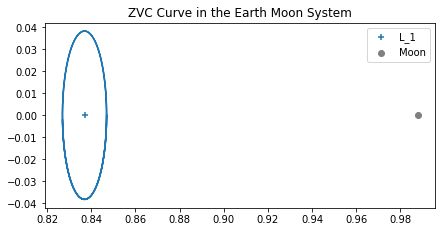

In [249]:
U_xx, U_yy, U_zz, U_xy, _, _ = pn.U_ii(L1+xi_0, 0, 0, SS3.loc[system,'miu']) 

beta_1  = 2 - (U_xx + U_yy)/2
beta_2  = np.sqrt(-U_xx*U_yy)
s       = np.sqrt(beta_1 + np.sqrt(beta_1**2 + beta_2**2))
beta_3  = (s**2 + U_xx)/2/s

xi_dot_0    = eta_0*s/beta_3
eta_dot_0   = -beta_3*xi_0*s
zeta_dot_0  = 0

t_span = [0, 2*np.pi]
IC = np.append([xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
lin = solve_ivp(lambda t, x: pn.Lagrange_var_df(t, x, SS3.loc[system,'miu'], U_xx, U_yy, U_zz, U_xy), t_span , IC, method='RK45',
                rtol=10**-12, atol=10**-16)


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.scatter([L1],[0], marker="+", label = 'L_1')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.plot(lin.y[0,:]+L1, lin.y[1,:])
axs.set_aspect('equal', 'box')
axs.set_title('ZVC Curve in the Earth Moon System')
axs.legend()

### Part b)

In [250]:
max_dist = np.max( np.linalg.norm(lin.y[0:3], axis=0) )
print('Maximum distance:', round(max_dist,2))
print('Maximum distance (km):', round(pn.L_2_dim(max_dist, SS3.loc[system, 'l*']),2))
print('Period (-):', round(t_span[-1],2))
Per = timedelta(seconds= pn.t_2_dim(t_span[-1], SS3.loc[system, 't*']))
print('Period :',  Per)

Maximum distance: 0.04
Maximum distance (km): 14662.02
Period (-): 6.28
Period : 27 days, 6:49:49.920558


### Part c)

The Jacobi constant is:  3.18


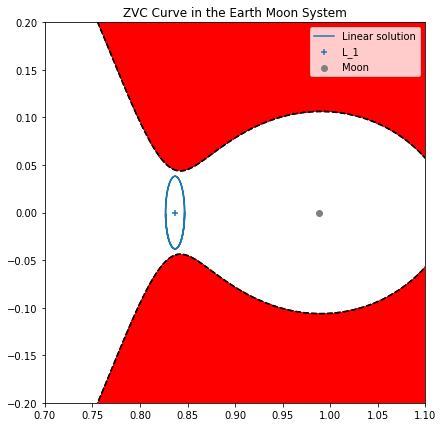

In [251]:
x_range = np.linspace(-0.75, 1.2, 2000)
y_range = np.linspace(-0.5, 0.5, 2000)
v = np.linalg.norm([xi_dot_0, eta_dot_0, zeta_dot_0])

[X, Y] = np.meshgrid(x_range, y_range)
C = pn.Jacobi_const(X, Y, 0, 0, SS3.loc[system,'miu'])
C0 = pn.Jacobi_const(xi_0+L1, 0, 0, v, SS3.loc[system,'miu'])

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.contourf(X,Y, -C, levels = [-C0, -C0+10**-12], extend = 'max', cmap = 'rainbow')
axs.contour(X,Y, -C, levels = [-C0, -C0+10**-12], colors='black')
axs.scatter([L1],[0], marker="+", label = 'L_1')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.plot(lin.y[0,:]+L1, lin.y[1,:], label='Linear solution')
axs.set_aspect('equal', 'box')
axs.set_title('ZVC Curve in the Earth Moon System')
axs.set_xlim([.7, 1.1])
axs.set_ylim([-.2, .2])
axs.legend()

print("The Jacobi constant is: ", round(C0,2))

### Part d)

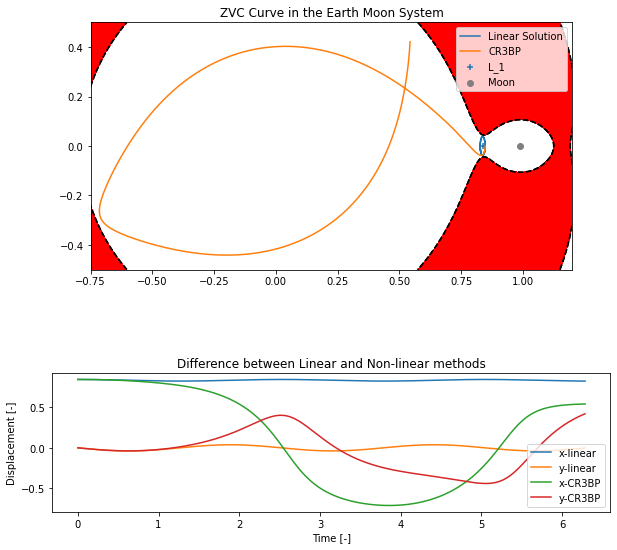

In [252]:
t_span = [0, 2*np.pi]

IC = np.append([L1+xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
non_lin = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC, method='RK45',
                    rtol=10**-12, atol=10**-16)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
ax[0].contourf(X,Y, -C, levels = [-C0, -C0+10**-12], extend = 'max', cmap = 'rainbow')
ax[0].contour(X,Y, -C, levels = [-C0, -C0+10**-12], colors='black')
ax[0].scatter([L1],[0], marker="+", label = 'L_1')
ax[0].scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
ax[0].plot(lin.y[0,:]+L1, lin.y[1,:], label='Linear Solution')
ax[0].plot(non_lin.y[0,:], non_lin.y[1,:], label='CR3BP')
ax[0].set_aspect('equal', 'box')
ax[0].set_title('ZVC Curve in the Earth Moon System')
ax[0].legend()


ax[1].plot(lin.t, np.vstack((lin.y[0,:]+L1, lin.y[1,:])).T, label=['x-linear', 'y-linear'])
ax[1].plot(non_lin.t, non_lin.y[0:2,:].T, label=['x-CR3BP', 'y-CR3BP'])
ax[1].set_aspect('equal', 'box')
ax[1].set_title('Difference between Linear and Non-linear methods')
ax[1].set_xlabel('Time [-]')
ax[1].set_ylabel('Displacement [-]')
ax[1].legend()

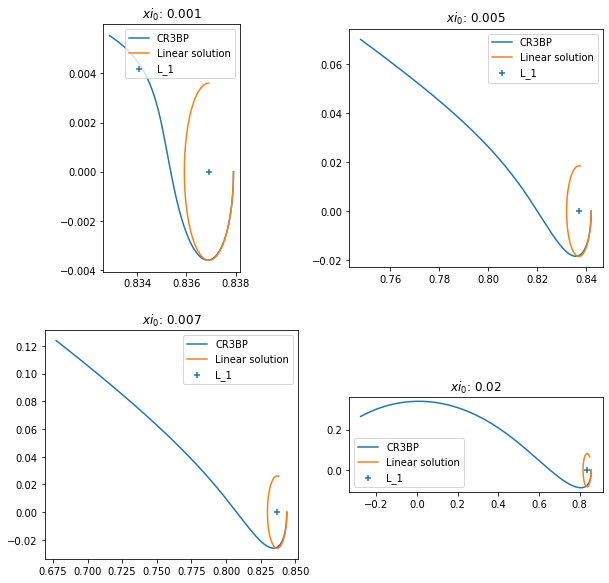

In [265]:
xi_0s = np.array([0.001, 0.005, 0.007, 0.02])
t_span = [0, 2]
fig1, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax1 = ax1.ravel()

for i, xi_0 in enumerate(xi_0s):

    U_xx, U_yy, U_zz, U_xy, _, _ = pn.U_ii(L1+xi_0, 0, 0, SS3.loc[system,'miu']) 

    beta_1  = 2 - (U_xx + U_yy)/2
    beta_2  = np.sqrt(-U_xx*U_yy)
    s       = np.sqrt(beta_1 + np.sqrt(beta_1**2 + beta_2**2))
    beta_3  = (s**2 + U_xx)/2/s

    xi_dot_0    = eta_0*s/beta_3
    eta_dot_0   = -beta_3*xi_0*s
    zeta_dot_0  = 0

    IC = np.append([xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
    lin = solve_ivp(lambda t, x: pn.Lagrange_var_df(t, x, SS3.loc[system,'miu'], U_xx, U_yy, U_zz, U_xy), t_span , IC, method='RK45',
                    rtol=10**-12, atol=10**-16)
    
    IC = np.append([L1+xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
    non_lin = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC, method='RK45',
                        rtol=10**-12, atol=10**-16)
    

    ax1[i].scatter([L1],[0], marker="+", label = 'L_1')
    ax1[i].plot(non_lin.y[0,:], non_lin.y[1,:], label='CR3BP')
    ax1[i].plot(lin.y[0,:]+L1, lin.y[1,:], label='Linear solution')
    ax1[i].set_aspect('equal', 'box')
    ax1[i].set_title(('$xi_0$: '+ str(round(xi_0,3))))
    ax1[i].legend()


### Part e)

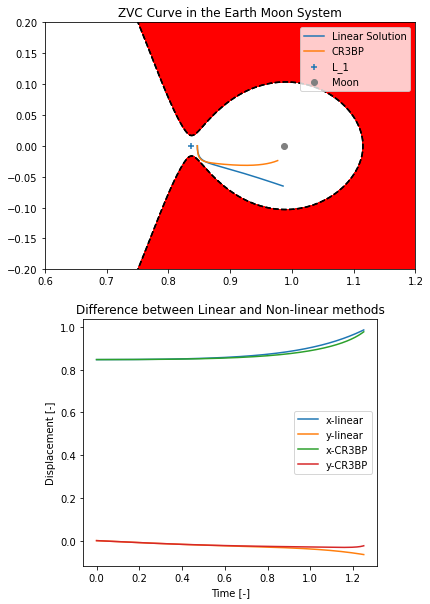

In [255]:
xi_0    = 0.01
U_xx, U_yy, U_zz, U_xy, _, _ = pn.U_ii(L1+xi_0, 0, 0, SS3.loc[system,'miu']) 

beta_1  = 2 - (U_xx + U_yy)/2
beta_2  = np.sqrt(-U_xx*U_yy)
lamda_1 = np.sqrt(-beta_1 + np.sqrt(beta_1**2 + beta_2**2))
alpha_1 = (lamda_1 - U_xx)/2/lamda_1

xi_dot_0    = eta_0 * lamda_1 / alpha_1
eta_dot_0   = xi_0 * alpha_1 * lamda_1
zeta_dot_0  = 0

t_span = [0, 1.25]
IC = np.append([xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
lin = solve_ivp(lambda t, x: pn.Lagrange_var_df(t, x, SS3.loc[system,'miu'], U_xx, U_yy, U_zz, U_xy), t_span , IC, method='RK45',
                rtol=10**-12, atol=10**-16)

IC = np.append([L1+xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
non_lin = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC, method='RK45',
                    rtol=10**-12, atol=10**-16)

v = np.linalg.norm([xi_dot_0, eta_dot_0, zeta_dot_0])
C0 = pn.Jacobi_const(xi_0+L1, 0, 0, v, SS3.loc[system,'miu'])


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
ax[0].contourf(X,Y, -C, levels = [-C0, -C0+10**-12], extend = 'max', cmap = 'rainbow')
ax[0].contour(X,Y, -C, levels = [-C0, -C0+10**-12], colors='black')
ax[0].scatter([L1],[0], marker="+", label = 'L_1')
ax[0].scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
ax[0].plot(lin.y[0,:]+L1, lin.y[1,:], label='Linear Solution')
ax[0].plot(non_lin.y[0,:], non_lin.y[1,:], label='CR3BP')
ax[0].set_aspect('equal', 'box')
ax[0].set_xlim([.6, 1.2])
ax[0].set_ylim([-.2, .2])
ax[0].set_title('ZVC Curve in the Earth Moon System')
ax[0].legend()


ax[1].plot(lin.t, np.vstack((lin.y[0,:]+L1, lin.y[1,:])).T, label=['x-linear', 'y-linear'])
ax[1].plot(non_lin.t, non_lin.y[0:2,:].T, label=['x-CR3BP', 'y-CR3BP'])
ax[1].set_aspect('equal', 'box')
ax[1].set_title('Difference between Linear and Non-linear methods')
ax[1].set_xlabel('Time [-]')
ax[1].set_ylabel('Displacement [-]')
ax[1].legend()